## Imports and Setups

In [4]:
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as pltB
import os

In [2]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.1 MB/s eta 0:00:00a 0:00:01
--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1752, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1390, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/segment.py", line 245, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1368, in render
    renderable = rich_cast(rendera

In [5]:
os.listdir()

['set-up', '.ipynb_checkpoints', 'EDTA.ipynb']

## Analysis

In [6]:
train = pd.read_csv('../dataset/train.csv')
test = pd.read_csv('../dataset/test.csv')

train.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [7]:
train.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,750000.000000,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,374999.500000,64.504738,59.859901,52.236449,1.348855,45.437406
std,216506.495284,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000
25%,187499.750000,35.730000,39.410000,28.380000,0.000000,23.178350
50%,374999.500000,63.840000,60.050000,53.580000,1.000000,43.379460
75%,562499.250000,94.070000,79.530000,76.600000,2.000000,64.811580
max,749999.000000,325.240000,119.460000,119.910000,103.910000,119.970000


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


## NOTES
- Need to handle NaN values intuitively.

In [9]:
df = train

In [10]:
for ep_title in df["Episode_Title"]:
    if "Episode" not in ep_title:
        print(ep_title)
# all the ep title contain episode no
    # which is i think irrileavant information

print("No of unique podcasts [Podcast_Name]:", df["Podcast_Name"].nunique())
# so this type of feature need to be one hot incoded and 

na_columns = []
for col in df.columns:
    no_count = df[col].isna().sum()
    if no_count: 
        print(f"NA values in {col}: {no_count}")
        na_columns.append(col)
na_columns

No of unique podcasts [Podcast_Name]: 48
NA values in Episode_Length_minutes: 87093
NA values in Guest_Popularity_percentage: 146030
NA values in Number_of_Ads: 1


['Episode_Length_minutes', 'Guest_Popularity_percentage', 'Number_of_Ads']

In [14]:
import pandas as pd
import re

# Assuming your dataframe is named df
def extract_episode_number(title):
    match = re.search(r'\bEpisode\s+(\d+)\b', title, flags=re.IGNORECASE)
    return int(match.group(1)) if match else None

# Create the new column
train['Episode_Number'] = train['Episode_Title'].apply(extract_episode_number)


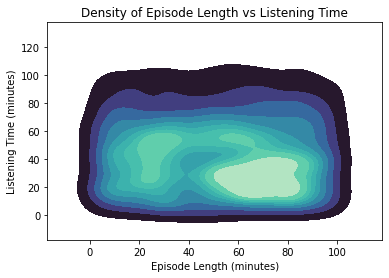

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data (assuming already loaded)
# df = pd.read_csv('train.csv')  # example

# Optional: drop NaNs to avoid errors in KDE
df_kde = train[['Episode_Number', 'Listening_Time_minutes']].dropna()

# Downsample if dataset is very large
df_kde = df_kde.sample(n=10000, random_state=42)  # tune this if needed

# KDE Plot
sns.kdeplot(
    data=df_kde,
    x='Episode_Number',
    y='Listening_Time_minutes',
    cmap='mako',
    fill=True,
    thresh=0.05
)

plt.title('Density of Episode Length vs Listening Time')
plt.xlabel('Episode Length (minutes)')
plt.ylabel('Episode_Number')
plt.show()


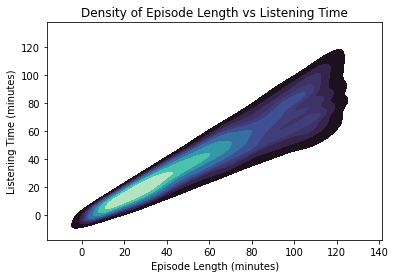

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data (assuming already loaded)
# df = pd.read_csv('train.csv')  # example

# Optional: drop NaNs to avoid errors in KDE
df_kde = train[['Episode_Length_minutes', 'Listening_Time_minutes']].dropna()

# Downsample if dataset is very large
df_kde = df_kde.sample(n=10000, random_state=42)  # tune this if needed

# KDE Plot
sns.kdeplot(
    data=df_kde,
    x='Episode_Length_minutes',
    y='Listening_Time_minutes',
    cmap='mako',
    fill=True,
    thresh=0.05
)

plt.title('Density of Episode Length vs Listening Time')
plt.xlabel('Episode Length (minutes)')
plt.ylabel('Listening Time (minutes)')
plt.show()
